<a href="https://colab.research.google.com/github/htbkoo/AColaboratory/blob/master/spike/pandas_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [0]:
# Test plotting
# plt.plot([0,1,12])
# plt.suptitle('figure title', color='w')

In [0]:
import tensorflow as tf
import pandas as pd

In [5]:
tf.Session().run(tf.multiply(tf.constant(10), tf.constant(2)))

20

# Standford CS109 - A Titanic Probability 

(Retrieved from http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

This is the last question of [Problem set 5](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/pdfs/HO32%20ProblemSet5.pdf). In this problem you will use real data from the Titanic to calculate conditional probabilities and expectations. 

 On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The [titanic.csv](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv) file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S
), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

[Quetion12] Write a program in C, C++, Java or Python that reads the data file and finds the answers to the following questions:

 
    a. Calculate the conditional probability that a person survives given their sex and passenger-class:
    P(S= true | G=female,C=1)
    P(S= true | G=female,C=2)
    P(S= true | G=female,C=3)
    P(S= true | G=male,C=1)
    P(S= true | G=male,C=2)
    P(S= true | G=male,C=3)
    
    b. What is the probability that a child who is in third class and is 10 years old or younger survives? Since the number of data points that satisfy the condition is small use the "bayesian" approach and represent your probability as a beta distribution. Calculate a belief distribution for:
            S= true | A≤10,C=3
    You can express your answer as a parameterized distribution.
    
    C. How much did people pay to be on the ship? Calculate the expectation of fare conditioned on passenger-class:
    E[X | C=1]
    E[X | C=2]
    E[X | C=3]

You only have to submit your answers, not your program. As such you could get away with calculating these statistics by hand. Use a program. This is a warm up to problem set 6 where you will write machine learning algorithms (in C, C++, Java or Python) that read data and perform more advanced calculations.

Don't know how to create a new project from scratch? Ask a TA or download a blank CS106A Java project or a blank CS106B C++ project.

Aside: In making this problem I learned that there were somewhere between 80 and 153 passengers from present day Lebanon (then Ottoman Empire) on the Titanic. That would be 7% of the people aboard. 

## Extensions?

See if you can find something suprising in the dataset. Can you predict p? Can you find interesting correlations?

In [0]:
data = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

In [7]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


a. Calculate the conditional probability that a person survives given their sex and passenger-class:

* P(S= true | G=female,C=1)
* P(S= true | G=female,C=2)
* P(S= true | G=female,C=3)
* P(S= true | G=male,C=1)
* P(S= true | G=male,C=2)
* P(S= true | G=male,C=3)

In [0]:
def survivalRate(Sex, Pclass):
  return data[(data["Sex"]==Sex)&(data["Pclass"]==Pclass)]["Survived"].mean()

In [16]:
answers = [
    ("P(S= true | G=female,C=1)", survivalRate("female", 1)),
    ("P(S= true | G=female,C=2)", survivalRate("female", 2)),
    ("P(S= true | G=female,C=3)", survivalRate("female", 3)),
    ("P(S= true | G=male,C=1)", survivalRate("male", 1)),
    ("P(S= true | G=male,C=2)", survivalRate("male", 2)),
    ("P(S= true | G=male,C=3)", survivalRate("male", 3))
]

[print("{} = {}".format(*answer)) for answer in answers ]
# [answer for answer in answers ]
# [print("{}".format(*condition)) for condition in conditions ]

None

P(S= true | G=female,C=1) = 0.9680851063829787
P(S= true | G=female,C=2) = 0.9210526315789473
P(S= true | G=female,C=3) = 0.5
P(S= true | G=male,C=1) = 0.36885245901639346
P(S= true | G=male,C=2) = 0.1574074074074074
P(S= true | G=male,C=3) = 0.13702623906705538


In [46]:
HEADER_ROW = 0
df = pd.DataFrame(answers).transpose()
df.columns = df.iloc[HEADER_ROW]
df = df.reindex(df.index.drop(HEADER_ROW))
df

,"P(S= true | G=female,C=1)","P(S= true | G=female,C=2)","P(S= true | G=female,C=3)","P(S= true | G=male,C=1)","P(S= true | G=male,C=2)","P(S= true | G=male,C=3)"
1,0.968085,0.921053,0.5,0.368852,0.157407,0.137026


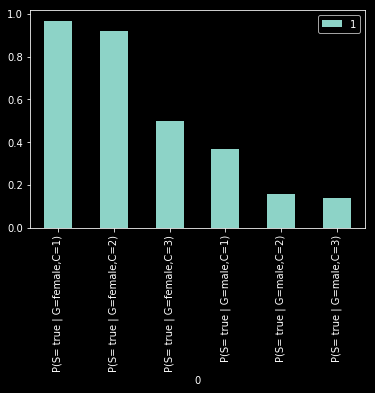

In [50]:
df.transpose().plot(kind="bar")

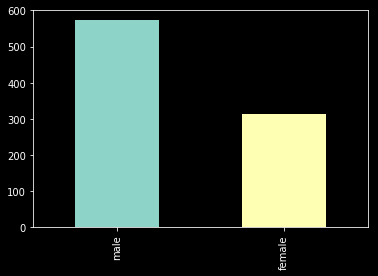

In [27]:
data["Sex"].value_counts().plot(kind="bar")

b. What is the probability that a child who is in third class and is 10 years old or younger survives? Since the number of data points that satisfy the condition is small use the "bayesian" approach and represent your probability as a beta distribution. Calculate a belief distribution for:
        S= true | A≤10,C=3
You can express your answer as a parameterized distribution.